# CS210: Data Management for Data Science Assignment 3
##### Aatif Sayed&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;(NetID: as3259)
##### Akshada Rajadhyksha&emsp;(NetID: aar219)
## Problem 2: German Credit Dataset (72 points)
Given a CSV data file as represented by the sample file GermanCredit.csv (1000 records), load it into a Pandas DataFrame, and perform the following tasks on it.

**Important: Your code should be applicable to any extension of this sample, so make sure you don't hardcode anything that applies only to the values in this sample.**
### 2.1: Preprocessing (31 pts)
1. [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [61]:
# Problem 2.1.1

# Import necessary modules
import numpy as np
import pandas as pd

# Read and load CSV file
data = pd.read_csv("GermanCredit.csv")

# Number of least contributing columns to be dropped; value can be changed to generalize code to drop n columns
n = 3

none_count_per_column_index = []

for column in data :
    column_none_count_dict = {}
    column_none_count_dict = data[column].value_counts()
    if column_none_count_dict.get("none") == None :
        none_count_per_column_index.append(0)
    else :
        none_count_per_column_index.append(column_none_count_dict.get("none"))

for i in range(n) :
    list1 = [i for i, x in enumerate(none_count_per_column_index) if x == max(none_count_per_column_index) and x != 0]
    if list1 :
        none_count_per_column_index.remove(none_count_per_column_index[list1[0]])
        data.drop(data.columns[list1[0]], axis=1, inplace=True)
    
# Export updated data to a new CSV file (prevents original file from being modified)
data.to_csv("GermanCreditUpdated.csv", index=False)

# Show sample of output
data.head(60)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings','1<=X<4',2,'male single',4,'no known property',35,'for free',1,'unskilled resident',2,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,'500<=X<1000','>=7',3,'male single',4,'life insurance',53,own,1,skilled,1,yes,good
7,'0<=X<200',36,'existing paid','used car',6948,'<100','1<=X<4',2,'male single',2,car,35,rent,1,'high qualif/self emp/mgmt',1,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,'>=1000','4<=X<7',2,'male div/sep',4,'real estate',61,own,1,'unskilled resident',1,yes,good
9,'0<=X<200',30,'critical/other existing credit','new car',5234,'<100',unemployed,4,'male mar/wid',2,car,28,own,2,'high qualif/self emp/mgmt',1,yes,bad


2. [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [62]:
# Problem 2.1.2

data = pd.read_csv("GermanCreditUpdated.csv")

for row in data.index :
    for column in range(len(data.columns)) :
        data.iloc[row, column] = str(data.iloc[row, column]).replace("'", "")
        
# Export updated data to the same CSV file that we created earlier (prevents original file from being modified)
data.to_csv("GermanCreditUpdated.csv", index=False)

# Show sample of output
data.head(60)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,4,life insurance,53,own,1,skilled,1,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,2,car,28,own,2,high qualif/self emp/mgmt,1,yes,bad


3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [63]:
# Problem 2.1.3

data = pd.read_csv("GermanCreditUpdated.csv")

for row in data.index :
    if data.loc[row, "checking_status"] == "no checking" :
        data.loc[row, "checking_status"] = "No Checking"
        continue
    if data.loc[row, "checking_status"] == "<0" :
        data.loc[row, "checking_status"] = "Low"
        continue
    if data.loc[row, "checking_status"] == "0<=X<200" :
        data.loc[row, "checking_status"] = "Medium"
        continue
    if data.loc[row, "checking_status"] == ">=200" :
        data.loc[row, "checking_status"] = "High"
        continue

# Export updated data to the same CSV file that we created earlier (prevents original file from being modified)
data.to_csv("GermanCreditUpdated.csv", index=False)

# Show sample of output
data.head(60)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
5,No Checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,good
6,No Checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,4,life insurance,53,own,1,skilled,1,yes,good
7,Medium,36,existing paid,used car,6948,<100,1<=X<4,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,good
8,No Checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,good
9,Medium,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,2,car,28,own,2,high qualif/self emp/mgmt,1,yes,bad


4. [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [64]:
# Problem 2.1.4

data = pd.read_csv("GermanCreditUpdated.csv")

for row in data.index :
    if data.loc[row, "savings_status"] == "no known savings" :
        data.loc[row, "savings_status"] = "No Savings"
        continue
    if data.loc[row, "savings_status"] == "<100" :
        data.loc[row, "savings_status"] = "Low"
        continue
    if data.loc[row, "savings_status"] == "100<=X<500" :
        data.loc[row, "savings_status"] = "Medium"
        continue
    if data.loc[row, "savings_status"] == "500<=X<1000" :
        data.loc[row, "savings_status"] = "High"
        continue
    if data.loc[row, "savings_status"] == ">=1000" :
        data.loc[row, "savings_status"] = "High"
        continue

# Export updated data to the same CSV file that we created earlier (prevents original file from being modified)
data.to_csv("GermanCreditUpdated.csv", index=False)
     
# Show sample of output
data.head(60)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
5,No Checking,36,existing paid,education,9055,No Savings,1<=X<4,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,good
6,No Checking,24,existing paid,furniture/equipment,2835,High,>=7,3,male single,4,life insurance,53,own,1,skilled,1,yes,good
7,Medium,36,existing paid,used car,6948,Low,1<=X<4,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,good
8,No Checking,12,existing paid,radio/tv,3059,High,4<=X<7,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,good
9,Medium,30,critical/other existing credit,new car,5234,Low,unemployed,4,male mar/wid,2,car,28,own,2,high qualif/self emp/mgmt,1,yes,bad


5. [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'

In [65]:
# Problem 2.1.5

data = pd.read_csv("GermanCreditUpdated.csv")

for row in data.index :
    if data.loc[row, "class"] == "good" :
        data.loc[row, "class"] = "1"
        continue
    if data.loc[row, "class"] == "bad" :
        data.loc[row, "class"] = "0"
        continue

# Export updated data to the same CSV file that we created earlier (prevents original file from being modified)
data.to_csv("GermanCreditUpdated.csv", index=False)
     
# Show sample of output
data.head(60)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
5,No Checking,36,existing paid,education,9055,No Savings,1<=X<4,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,1
6,No Checking,24,existing paid,furniture/equipment,2835,High,>=7,3,male single,4,life insurance,53,own,1,skilled,1,yes,1
7,Medium,36,existing paid,used car,6948,Low,1<=X<4,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,1
8,No Checking,12,existing paid,radio/tv,3059,High,4<=X<7,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,1
9,Medium,30,critical/other existing credit,new car,5234,Low,unemployed,4,male mar/wid,2,car,28,own,2,high qualif/self emp/mgmt,1,yes,0


6. [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [66]:
# Problem 2.1.6

data = pd.read_csv("GermanCreditUpdated.csv")

for row in data.index :
    if data.loc[row, "employment"] == "unemployed" :
        data.loc[row, "employment"] = "Unemployed"
        continue
    if data.loc[row, "employment"] == "<1" :
        data.loc[row, "employment"] = "Amateur"
        continue
    if data.loc[row, "employment"] == "1<=X<4" :
        data.loc[row, "employment"] = "Professional"
        continue
    if data.loc[row, "employment"] == "4<=X<7" :
        data.loc[row, "employment"] = "Experienced"
        continue
    if data.loc[row, "employment"] == ">=7" :
        data.loc[row, "employment"] = "Expert"
        continue

# Export updated data to the same CSV file that we created earlier (prevents original file from being modified)
data.to_csv("GermanCreditUpdated.csv", index=False)
     
# Shows sample of output
data.head(60)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
5,No Checking,36,existing paid,education,9055,No Savings,Professional,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,1
6,No Checking,24,existing paid,furniture/equipment,2835,High,Expert,3,male single,4,life insurance,53,own,1,skilled,1,yes,1
7,Medium,36,existing paid,used car,6948,Low,Professional,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,1
8,No Checking,12,existing paid,radio/tv,3059,High,Experienced,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,1
9,Medium,30,critical/other existing credit,new car,5234,Low,Unemployed,4,male mar/wid,2,car,28,own,2,high qualif/self emp/mgmt,1,yes,0


### 2.2: Analysis (17 pts)
For the following tasks, do preprocessing or changing of data types in the data frame as required.
1. [5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.

One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.

  * a) [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).
  * b) [2 pts] Similarly, get the count of each category of employment for each category of saving_status.

In [67]:
# Problem 2.2.1

data2 = pd.read_csv("GermanCredit.csv")
cross = pd.crosstab(data2.foreign_worker, data2["class"])
print("Part a)")
display(cross)
    
cross = pd.crosstab(data.employment, data.savings_status)
print("Part b)")
display(cross)

Part a)


class,bad,good
foreign_worker,,
no,4,33
yes,296,667


Part b)


savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


2. [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [68]:
# Problem 2.2.2

credit_amount_list = []

for row in data.index :
    if data.loc[row, "personal_status"] == "male single" and data.loc[row, "employment"] == "Professional" :
        credit_amount_list.append(data.loc[row, "credit_amount"])
        
print("Average credit amount of single males that have 4<=X<7 years of employment: ", end="")
print(np.mean(credit_amount_list))

Average credit amount of single males that have 4<=X<7 years of employment: 3650.9085714285716


3. [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [69]:
# Problem 2.2.3

skilled = []
unskilled = []
high_qualif = []
unemp = []

for row in data.index :
    if data.loc[row, "job"] == "skilled" :
        skilled.append(data.loc[row, "duration"])
        continue
    if data.loc[row, "job"] == "unskilled resident" :
        unskilled.append(data.loc[row, "duration"])
        continue
    if data.loc[row, "job"] == "high qualif/self emp/mgmt" :
        high_qualif.append(data.loc[row, "duration"])
        continue
    if data.loc[row, "job"] == "unemp/unskilled non res" :
        unemp.append(data.loc[row, "duration"])
        continue

print("Credit duration for 'skilled' jobs:", np.mean(skilled))
print("Credit duration for 'unskilled resident jobs':", np.mean(unskilled))
print("Credit duration for 'high qualif/self emp/mgmt' jobs:", np.mean(high_qualif))
print("Credit duration for 'unemp/unskilled non res' jobs:", np.mean(unemp))

Credit duration for 'skilled' jobs: 21.41111111111111
Credit duration for 'unskilled resident jobs': 16.535
Credit duration for 'high qualif/self emp/mgmt' jobs: 25.16891891891892
Credit duration for 'unemp/unskilled non res' jobs: 17.363636363636363


4. [4 pts] For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:

    ```
    Most common checking status: ...
    Most common savings status: ...
    ```

In [70]:
# Problem 2.2.4

def problemTwoAnalysisPartFour(file):
    with open(file) as openedFile:
        dfpd = pd.DataFrame(openedFile)
        cCount1 = 0
        cCount2 = 0
        cCount3 = 0
        cCount4 = 0
        
        sCount1 = 0
        sCount2 = 0
        sCount3 = 0
        sCount4 = 0
        sCount5 = 0
        
        cStatus1 = "no checking"
        cStatus2 = "<0"
        cStatus3 = "0<=X<200"
        cStatus4 = ">=200"  
        
        sStatus1 = "no known savings"
        sStatus2 = "<100"
        sStatus3 = "100<=X<500"
        sStatus4 = "500<=X<1000"
        sStatus5 = ">=1000"
        
        for row in dfpd.iterrows():
            for val in row[1]:
                x = val.split(",")
                if x[3] == "education":
                    if x[0] == "'no checking'":
                        cCount1 = cCount1 + 1
                    elif x[0] == "'<0'":
                        cCount2 = cCount1 + 1
                    elif x[0] == "'0<=X<200'":
                        cCount3 = cCount1 + 1
                    elif x[0] == "'>=200'":
                        cCount4 = cCount1 + 1
                    if x[5] == "'no known savings'":
                        sCount1 = sCount1 + 1
                    elif x[5] == "'<100'":
                        sCount2 = sCount2 + 1
                    elif x[5] == "'100<=X<500'":
                        sCount3 = sCount3 + 1
                    elif x[5] == "'500<=X<1000'":
                        sCount4 = sCount4 + 1
                    elif x[5] == "'>=1000'":
                        sCount5 = sCount5 + 1
        if max(cCount1, cCount2, cCount3, cCount4) == cCount1:
            checkingResult = cStatus1
        elif max(cCount1, cCount2, cCount3, cCount4) == cCount2:
            checkingResult = cStatus2
        elif max(cCount1, cCount2, cCount3, cCount4) == cCount3:
            checkingResult = cStatus3
        elif max(cCount1, cCount2, cCount3, cCount4) == cCount4:
            checkingResult = cStatus4
            
        if max(sCount1, sCount2, sCount3, sCount4, sCount5) == sCount1:
            savingsResult = sStatus1
        elif max(sCount1, sCount2, sCount3, sCount4, sCount5) == sCount2:
            savingsResult = sStatus2
        elif max(sCount1, sCount2, sCount3, sCount4, sCount5) == sCount3:
            savingsResult = sStatus3
        elif max(sCount1, sCount2, sCount3, sCount4, sCount5) == sCount4:
            savingsResult = sStatus4
        elif max(sCount1, sCount2, sCount3, sCount4, sCount5) == sCount5:
            savingsResult = sStatus5
        
        print("Most common checking status:", checkingResult)       
        print("Most common savings status:", savingsResult) 
        
problemTwoAnalysisPartFour("GermanCredit.csv")

Most common checking status: no checking
Most common savings status: <100


### 2.3: Visualization (24 pts)
1. [9 pts] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.

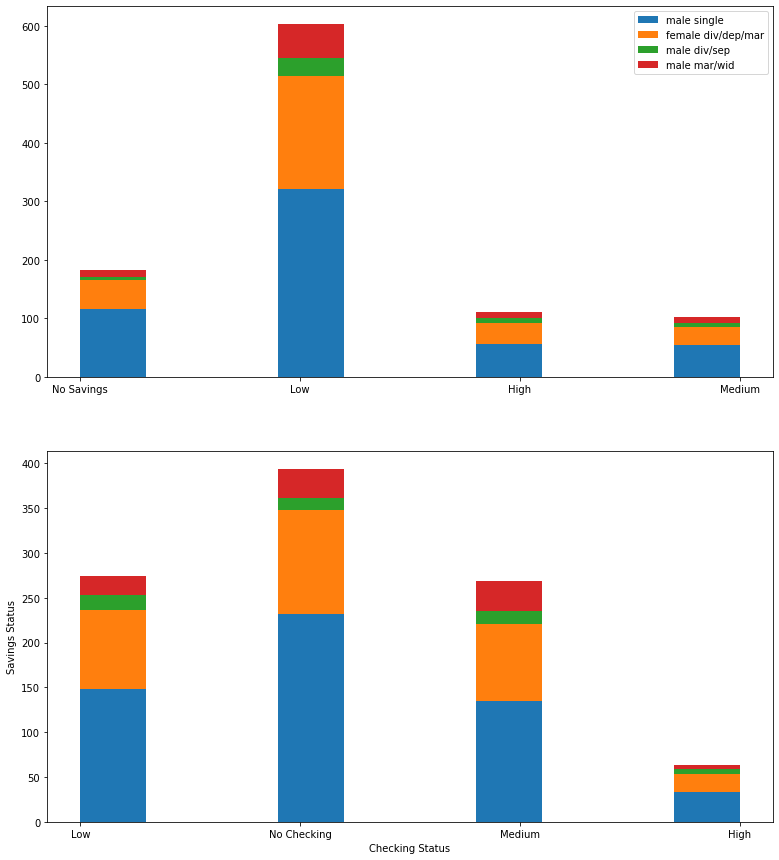

In [71]:
# Problem 2.3.1

personalStatus = list(data.personal_status.unique())
figure, reference = plt.subplots(2, 1, figsize=(13, 15))
plt.xlabel("Checking Status")
plt.ylabel("Savings Status")
plot_one = [data[data['personal_status'] == x].savings_status for x in personalStatus]
plot_two = [data[data['personal_status'] == x].checking_status for x in personalStatus]
reference[0].hist(plot_one, label=personalStatus, stacked='True')
reference[0].legend()
reference[1].hist(plot_two, label=personalStatus, stacked='True')
plt.show()

2. [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

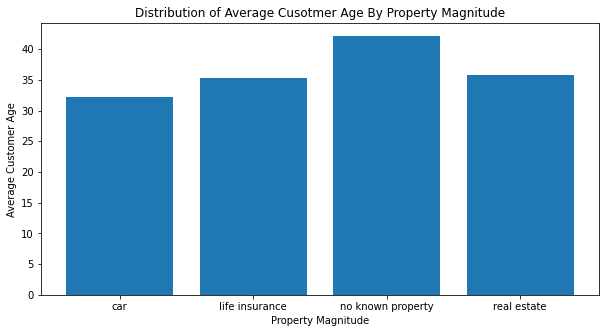

In [72]:
# Problem 2.3.2

var = data[data.credit_amount > 4000]
xAxis = var.groupby('property_magnitude').count()
yAxis = var.groupby('property_magnitude').sum()
varBar = (yAxis['age'] / xAxis['age']).reset_index()

plt.figure(figsize = (10, 5))
plt.xlabel("Property Magnitude")
plt.ylabel("Average Customer Age")
plt.title("Distribution of Average Cusotmer Age By Property Magnitude")
plt.bar(varBar['property_magnitude'], varBar['age'])
plt.show()

3. [6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
  * a) Personal status
  * b) Credit history
  * c) Job

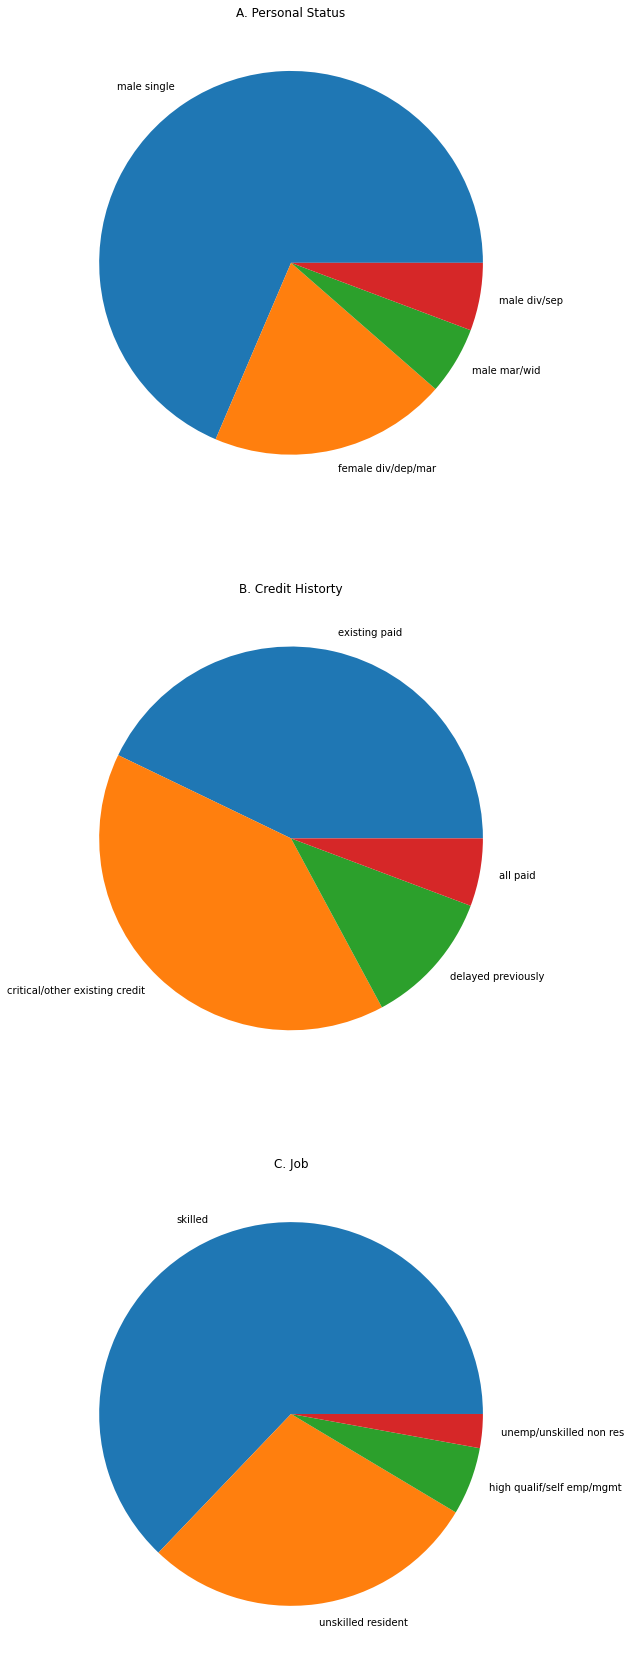

In [73]:
# Problem 2.3.3

data3 = (data['age'] > 40) & (data['savings_status'] == 'High')
pieChart = data[data3]
fig, ref = plt.subplots(3, 1, figsize = (50, 30))
personalStatus2 = pieChart['personal_status'].value_counts().reset_index()
ref[0].pie(personalStatus2['personal_status'], labels = personalStatus2['index'])
ref[0].set_title("A. Personal Status")

creditHistory2 = pieChart['credit_history'].value_counts().reset_index()
ref[1].pie(creditHistory2['credit_history'], labels = creditHistory2['index'])
ref[1].set_title("B. Credit Historty")

jobPie = pieChart['job'].value_counts().reset_index()
ref[2].pie(jobPie['job'], labels = jobPie['index'])
ref[2].set_title("C. Job")

plt.show()